计算每个项目所设立的年份

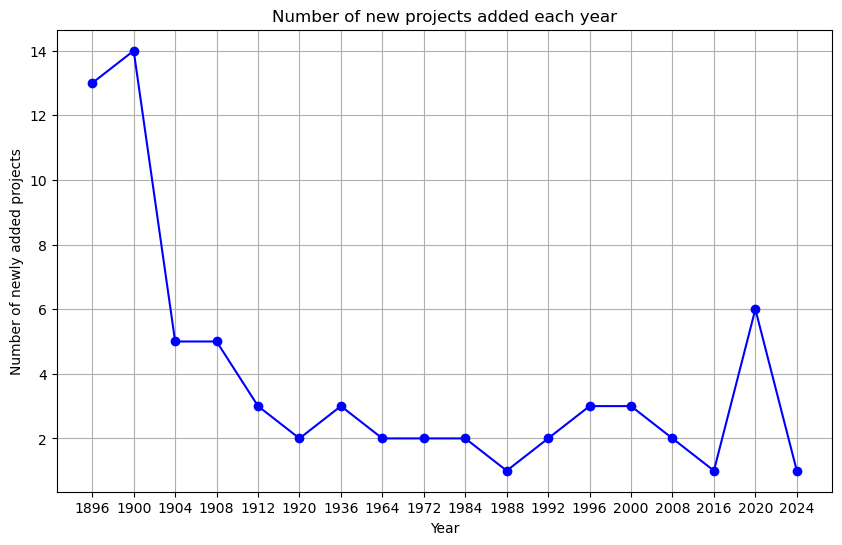

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据文件
data_file = "2025_Problem_C_Data/summerOly_programs.csv"
df = pd.read_csv(data_file)

# 提取年份列
columns = df.columns[4:]

# 初始化结果存储
results = []

# 遍历每一行
for index, row in df.iterrows():
    sport = row["Sport"]
    discipline = row["Discipline"]
    code = row["Code"]
    governing_body = row["Sports Governing Body"]

    # 找到从 0 变成非 0 的年份
    for year in columns:
        try:
            value = int(row[year])
            if value > 0:
                results.append(
                    {
                        "Sport": sport,
                        "Discipline": discipline,
                        "Code": code,
                        "Sports Governing Body": governing_body,
                        "Year": year,
                    }
                )
                break  # 找到第一个非零年份后跳出循环
        except ValueError:
            continue

# 转换为 DataFrame
results_df = pd.DataFrame(results)

# 统计每年新增项目数量
yearly_counts = results_df["Year"].value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(
    yearly_counts.index, yearly_counts.values, marker="o", linestyle="-", color="b"
)

# 添加标题和标签
plt.title("Number of new projects added each year")
plt.xlabel("Year")
plt.ylabel("Number of newly added projects")

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

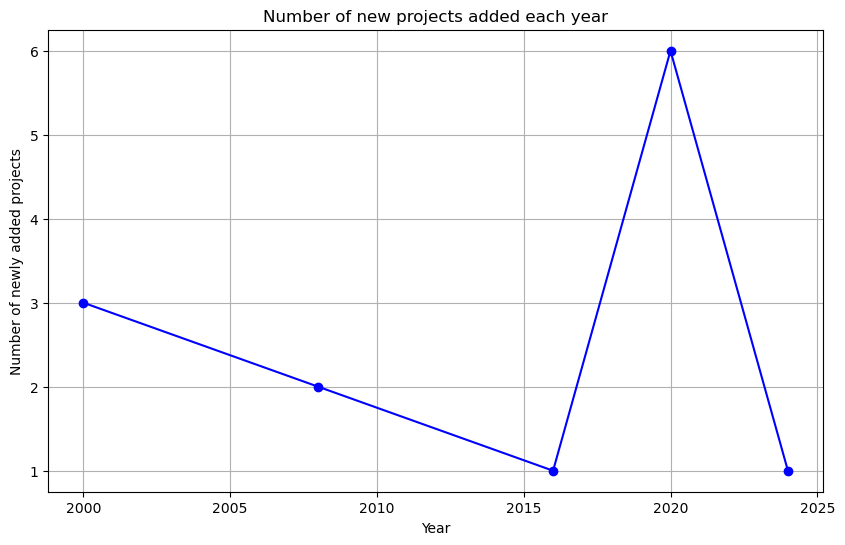

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取包含新增项目年份信息的 CSV 文件
df = pd.read_csv("first_nonzero_year_2000_onwards.csv")

# 统计每年新增项目数量
yearly_counts = df["Year"].value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(
    yearly_counts.index, yearly_counts.values, marker="o", linestyle="-", color="b"
)

# 添加标题和标签
plt.title("Number of new projects added each year")
plt.xlabel("Year")
plt.ylabel("Number of newly added projects")
# 显示网格
plt.grid(True)

# 显示图形
plt.show()

2. 求解到底是那些国家获奖了

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\18154\AppData\Local\Temp\ipykernel_13632\2090399377.py:5: SyntaxWarning: invalid escape sequence '\s'
  athletes_df = pd.read_csv("2025_Problem_C_Data\summerOly_athletes.csv")


Sport: Basketball, Year: 2020, Country: United States
Sport: Basketball, Year: 2020, Country: Japan
Sport: Basketball, Year: 2020, Country: France
Sport: Basketball, Year: 2020, Country: Australia
Sport: Breaking, Year: 2024, Country: France
Sport: Breaking, Year: 2024, Country: China
Sport: Breaking, Year: 2024, Country: Lithuania
Sport: Breaking, Year: 2024, Country: Japan
Sport: Breaking, Year: 2024, Country: United States
Sport: Breaking, Year: 2024, Country: Canada
Sport: Cycling, Year: 2008, Country: France
Sport: Cycling, Year: 2008, Country: United States
Sport: Cycling, Year: 2008, Country: New Zealand
Sport: Cycling, Year: 2008, Country: Great Britain
Sport: Cycling, Year: 2008, Country: Switzerland
Sport: Cycling, Year: 2008, Country: Denmark
Sport: Cycling, Year: 2008, Country: Argentina
Sport: Cycling, Year: 2008, Country: Germany
Sport: Cycling, Year: 2008, Country: Cuba
Sport: Cycling, Year: 2008, Country: Italy
Sport: Cycling, Year: 2008, Country: China
Sport: Cycling, 

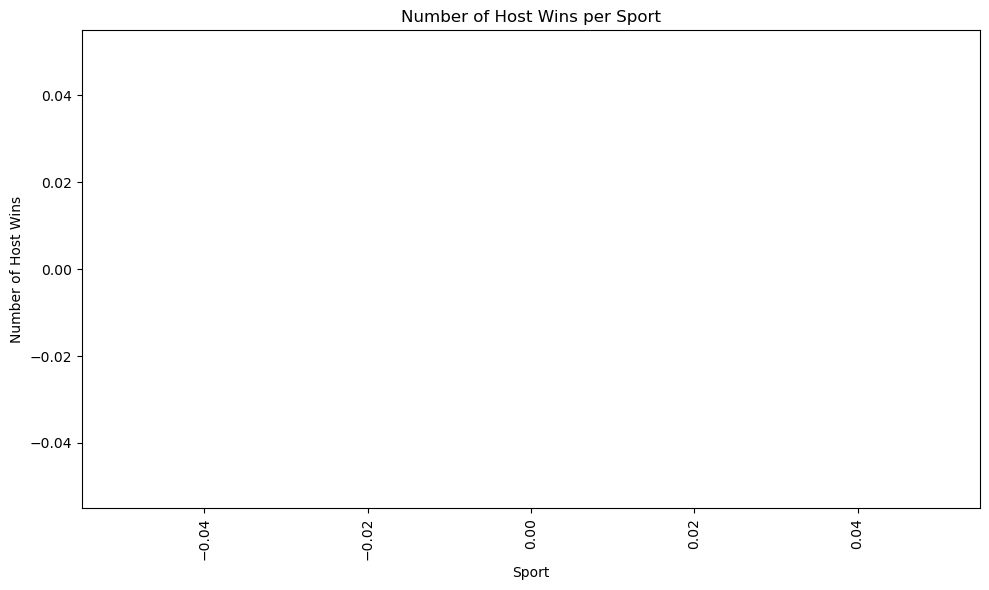

In [52]:
import pandas as pd

# 读取文件
first_nonzero_year_df = pd.read_csv("first_nonzero_year_2000_onwards.csv")
athletes_df = pd.read_csv("2025_Problem_C_Data\summerOly_athletes.csv")

# 用来存储每个项目的国家
result = []

# 遍历项目数据
for index, row in first_nonzero_year_df.iterrows():
    sport = row["Sport"]
    year = row["Year"]

    # 找到该项目和年份的所有运动员数据
    athletes_in_sport_year = athletes_df[
        (athletes_df["Sport"] == sport) & (athletes_df["Year"] == year)
    ]

    # 如果该项目有获奖运动员
    if not athletes_in_sport_year.empty:
        # 过滤出获得奖牌的运动员
        winners = athletes_in_sport_year[athletes_in_sport_year["Medal"] != "No medal"]

        # 如果有获奖运动员，输出对应国家（Team）
        if not winners.empty:
            countries = winners["Team"].unique()
            for country in countries:
                result.append((sport, year, country))

# 输出结果
for sport, year, country in result:
    print(f"Sport: {sport}, Year: {year}, Country: {country}")


# 将结果转换为DataFrame
host_wins_df = pd.DataFrame(list(host_wins.items()), columns=["Sport", "Host Wins"])

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(host_wins_df["Sport"], host_wins_df["Host Wins"], color="skyblue")
plt.xlabel("Sport")
plt.ylabel("Number of Host Wins")
plt.title("Number of Host Wins per Sport")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3. 分析新项目对奖牌数目的影响

In [43]:
import pandas as pd

# 读取文件
first_nonzero_year_df = pd.read_csv("first_nonzero_year_2000_onwards.csv")
athletes_df = pd.read_csv("2025_Problem_C_Data/summerOly_athletes.csv")
hosts_df = pd.read_csv("2025_Problem_C_Data/summerOly_hosts.csv")

# 清理列名，去除多余的空格
hosts_df.columns = hosts_df.columns.str.strip()
first_nonzero_year_df.columns = first_nonzero_year_df.columns.str.strip()
athletes_df.columns = athletes_df.columns.str.strip()

# 用来存储每个项目的国家
result = []

# 遍历项目数据
for index, row in first_nonzero_year_df.iterrows():
    sport = row["Sport"]
    year = row["Year"]

    # 找到该项目和年份的所有运动员数据
    athletes_in_sport_year = athletes_df[
        (athletes_df["Sport"] == sport) & (athletes_df["Year"] == year)
    ]

    # 如果该项目有获奖运动员
    if not athletes_in_sport_year.empty:
        # 过滤出获得奖牌的运动员
        winners = athletes_in_sport_year[athletes_in_sport_year["Medal"] != "No medal"]

        # 如果有获奖运动员，输出对应国家（Team）
        if not winners.empty:
            countries = winners["Team"].unique()
            for country in countries:
                result.append((sport, year, country))

# 将东道主数据清理为只有有效的年份和东道主国家
hosts_df = hosts_df[hosts_df["Host Country"] != "Cancelled"]

# 合并获奖数据与东道主数据
result_df = pd.DataFrame(result, columns=["Sport", "Year", "Country"])

# 合并东道主信息
merged_df = pd.merge(
    result_df, hosts_df[["Year", "Host Country"]], on="Year", how="inner"
)

# 计算东道主是否获奖
merged_df["Host Won Medal"] = merged_df["Country"] == merged_df["Host Country"]

# 计算每个东道主的获奖率
host_winning_rate = merged_df.groupby("Host Country")["Host Won Medal"].mean()

# 输出东道主获奖率
print("Host Country Winning Rate for New Sports:")
print(host_winning_rate)

Host Country Winning Rate for New Sports:
Host Country
Australia    0.055556
China        0.050000
France       0.166667
Japan        0.128205
Name: Host Won Medal, dtype: float64


将东道主的获奖率结果整理成一个表格，列成表，方便查看：

NameError: name 'plt' is not defined

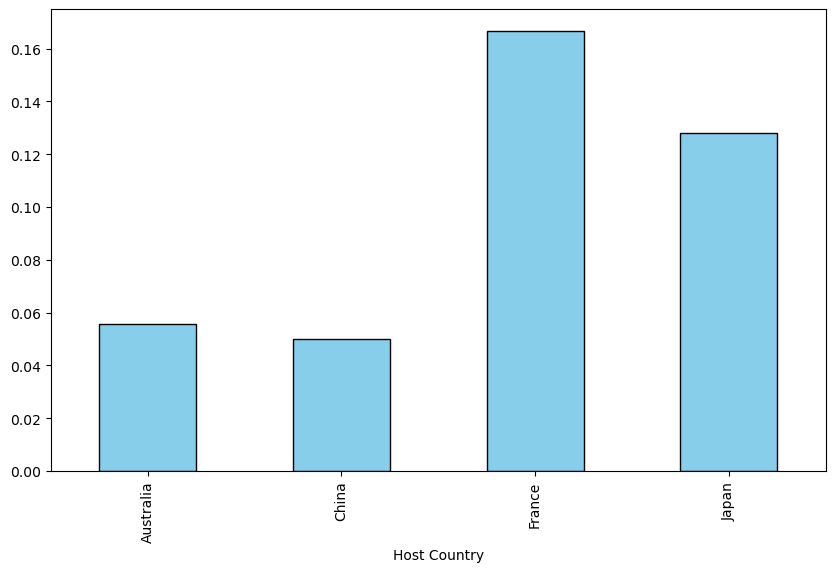

In [44]:
# 绘制柱状图
host_winning_rate.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(10, 6))

# 设置图表标题和坐标轴标签
plt.title("Host Country Winning Rate for New Sports (2000 Onwards)", fontsize=14)
plt.xlabel("Host Country", fontsize=12)
plt.ylabel("Winning Rate", fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()